
# Project: TMDb Movie Data Analysis 


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


The Movie Database (TMDb), contains information about 10,000 movies.There are some columns, like 'cas' and 'genres', which contain multiple values separated by pipe (|) characters and some odd characters in the 'cast' column. I left them as they were.
There are 2 final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

I oriented my analysis to revenue : Which is the evolution of revenues from year to year? What about the bugdet and popularity of movies in relationship with the revenues? Runtime and release year have an impact on the level of revenues obtained? What is the distribution of movies by release year?

In [32]:
# Gathering Data
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [33]:
# Loading of data and printing out a few lines.
# Performing operations to inspect data types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [34]:
# number of samples and columns
df.shape

(10866, 21)

In [35]:
# check for duplicates in the data
sum(df.duplicated())

1

In [36]:
# check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [37]:
# check for missing values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [38]:
# describe the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning (Replace this with more specific notes!)

We can make the following observations related to this dataset:

- 10866 samples
- 21 columns 
- 1 duplicated row
- datatypes of columns: for few columns we see the datatype float instead of int(popularity, budget_adj, revenue_adj), or string instead of datetime format(release_date, release_year) 
- several columns with missing values like: imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies
- describe the dataset: from the count, mean, standard deviation and the 5 number summary for each column, we notice zero values: 50% percentiles from budget and revenue columns, are 0. 

Taking into consederations only the columns neede for my analysis I perfoemd the next steps:

In [39]:
# 1.Remove extraneous columns :'id', 'imdb_id', 'cast', 'homepage', 'director','tagline', 'keywords', 'overview', 'production_companies'
# 'release_date', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj'

df = df.drop(['id', 'imdb_id', 'cast', 'homepage', 'director','tagline', 'keywords', 'overview', 'production_companies',
              'release_date', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj'], axis = 1)
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015


In [40]:
# number of samples and columns
df.shape

(10866, 7)

In [41]:
# check for duplicates in the data
sum(df.duplicated())

1

In [42]:
# 2.drop duplicates
df.drop_duplicates(inplace=True)

In [43]:
# confirm correction by rechecking for duplicates in the data
sum(df.duplicated())

0

In [44]:
# check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 7 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_year      10865 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 679.1+ KB


In [45]:
# changing the integer to datetime datatype for release_year column doesn't allow me to represent visually the evolution of revenue from year to year 
#df['release_year'] = pd.to_datetime(df['release_year'])

In [46]:
# check release_year datatype column
# df.info()

In [47]:
# describe the dataset
df.describe()

,popularity,budget,revenue,runtime,release_year
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,2001.321859
std,1.000231,3.091428e+07,1.170083e+08,31.382701,12.813260
min,0.000065,0.000000e+00,0.000000e+00,0.000000,1960.000000
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,1995.000000
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,2006.000000
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000


In [48]:
# replacing the zero values with NaN in budget,revenue and runtime column

zero_values = ['budget', 'revenue', 'runtime']
df[zero_values] = df[zero_values].replace(0, np.NAN)

In [49]:
# checking for replacements
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 7 columns):
popularity        10865 non-null float64
budget            5169 non-null float64
revenue           4849 non-null float64
original_title    10865 non-null object
runtime           10834 non-null float64
genres            10842 non-null object
release_year      10865 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 679.1+ KB


In [50]:
# 3.drop NaN values for budget, revenues and runtime columns
# df.dropna()

In [51]:
#checking again for zero or Nan values on budget, revenue and runtime columns
df.describe()

,popularity,budget,revenue,runtime,release_year
count,10865.000000,5.169000e+03,4.849000e+03,10834.000000,10865.000000
mean,0.646446,3.073958e+07,8.923886e+07,102.363855,2001.321859
std,1.000231,3.890441e+07,1.620801e+08,30.948225,12.813260
min,0.000065,1.000000e+00,2.000000e+00,2.000000,1960.000000
25%,0.207575,6.000000e+06,7.732325e+06,90.000000,1995.000000
50%,0.383831,1.700000e+07,3.185308e+07,99.000000,2006.000000
75%,0.713857,4.000000e+07,9.996575e+07,112.000000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis


### Question 1. How is the evolution in time of the revenue generated ?


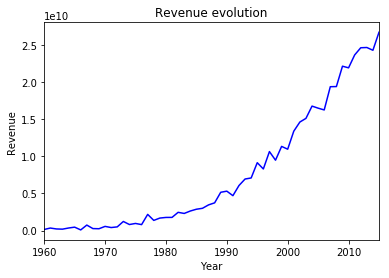

In [52]:
df.groupby('release_year')['revenue'].sum().plot(kind = 'line', color = 'b')
plt.title('Revenue evolution')
plt.xlabel('Year')
plt.ylabel('Revenue');

Revenues have increased continuously starting 1960.Begining with 1990 the high increase shows a big development in the movie industry.

### Research Question 2 . What the relationship between budget and revenue?

In [53]:
# Check correlation between variables
df.corr()

,popularity,budget,revenue,runtime,release_year
popularity,1.000000,0.479961,0.629305,0.136901,0.089806
budget,0.479961,1.000000,0.688556,0.265425,0.215402
revenue,0.629305,0.688556,1.000000,0.237748,0.121388
runtime,0.136901,0.265425,0.237748,1.000000,-0.112252
release_year,0.089806,0.215402,0.121388,-0.112252,1.000000


We can notice that between popularity and budget exists a strong positive corelation with the revenue, the correlation coeficient is 0,62 respectively 0,68. This means that if popularity and budget increases, the revenue increases, too.

Below we can represent it visually with the help of the scatterplot.

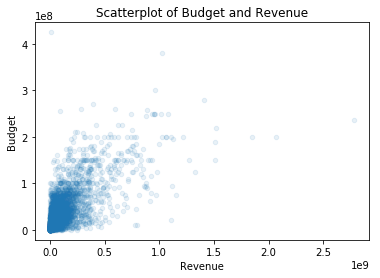

In [54]:
# plot relationship between budget and revenue -revised
df.plot(kind='scatter', x='revenue', y='budget', alpha = 0.1);

# plot the scatter
plt.title('Scatterplot of Budget and Revenue')
plt.xlabel('Revenue')
plt.ylabel('Budget')
plt.legend()
plt.show();

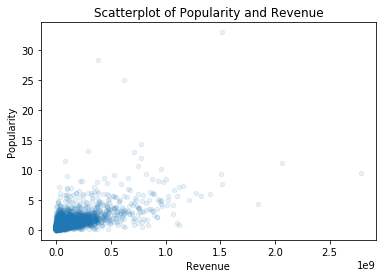

In [55]:
# plot relationship between popularity and revenue - revised
df.plot(kind='scatter', x='revenue', y='popularity', alpha = 0.1)

# plot the scatter
plt.title('Scatterplot of Popularity and Revenue')
plt.xlabel('Revenue')
plt.ylabel('Popularity')
plt.legend()
plt.show();

On the other side, we can notice a weak positive correlation between runtime and release_year and revenues.

### Research Question 3. What is the distribution of movies by release year?

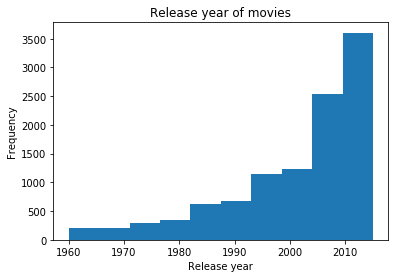

In [56]:
# plot the Release year of movies histogram - added

plt.hist(df['release_year'])
plt.title('Release year of movies')
plt.xlabel('Release year')
plt.ylabel('Frequency')

plt.show;

We can observe a left skewed distribution with data ranges from year 1960 to 2015.The bin ranging from 2010 to 2015 has the highest frequency.

<a id='conclusions'></a>
## Conclusions

My analysis was oriented on the Revenues variable of the movie dataset. I can conclude that starting 1990, making movies increased exponentially.

**High budget allocated and high popularity of the movies have higher values of revenues.The runtime period of movies and the release year have a weak positive correlation with the revenue obtained.**
 
 **The period between 2010 and 2015 has the highest frecvency of released movies.**

<a id='conclusions'></a>
## Limitations

I have found on revenue, budget and runtime columns an significant part of data with zero values.**I decided to replace the zero values with Nan, and not to drop them in order not to loose important data from others columns.**

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0